# 0. Mathematical Functions

This is a course on complex methods in the physical sciences. Before dealing with complex numbers, however, let us undertake a brief review of real mathematical functions and their properties.

## Real functions

A mathematical function, denoted $f$, takes an **input** $x$ (which is also called an **argument**), and returns an **output** $f(x)$. For now, we consider the case where both $x$ and $f(x)$ are real numbers. The set of possible inputs is called the **domain** of the function, and the set of possible outputs is called the **range**.

A well-defined function must have an unambiguous output: for any $x$ in the domain, $f(x)$ must be a specific number in the range. In other words, functions must be either one-to-one (injective) mappings, or many-to-one mappings. They can't be one-to-many or many-to-many. This is illustrated by the following graphs:

<img src="img/mathfunctions.png" alt="Figure of one-to-one, many-to-one, and one-to-many mappings.">

Simple examples of mathematical functions are those based on elementary algebra operations:

$$f(x) = x + 2 \,\;\;\qquad\qquad \text{(a one-to-one function)}$$
$$f(x) = x^2 + 2x + 4 \qquad \text{(a many-to-one function)}$$


<a name="exponential"></a>
### The exponential function

The exponential function, conventionally denoted by "$\exp$", is a particularly important and ubiquitous function.  You've probably come across it before, but let's recall the motivation behind it.  We begin by thinking about what it means to take a number $x$ to the power of $y$:

$$f(x) = x^y.$$

For values of $y$ in the natural numbers $\mathbb{N} \equiv \{1,2,3,\dots\}$, the power operation simply means multiplying $x$ by itself $y$ times.  For example, $x^4 = x \cdot x \cdot x \cdot x$.  But what about non natural number powers, like $x^{-1}$ or $x^{1/2}$ or $x^{3.14}$?

To help answer this question, we introduce the exponential function, defined as the following limiting infinite series:

$$\exp(x) \equiv 1 + \sum_{n=1}^\infty\frac{x^n}{n!}, \qquad x \in \mathbb{R}.$$

Note that the infinite series in this definition uses natural number powers only.  This is therefore a well-defined function, relying on the algebraic concepts discussed so far.  Its domain is the entire set of real numbers, $\mathbb{R}$, and its range is the set of positive numbers, $\mathbb{R}^+$.

In Python, you can compute the exponential using the [`exp`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) function, defined in the Numpy (Numeric Python) package, as shown in the following example:

In [16]:
from numpy import exp

x = 2.0

## Print the value of exp(x)
print(exp(x))

## Compare this to the first few orders of the series expansion:
print(1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120)

7.38905609893065
7.266666666666667


In the above example, please feel free to adjust the value of $x$ and see how the outputs change.  You should also play around, in a similar way, with the other Python examples found in these notebooks.

Here is a graph of the exponential function:
<a name="exponential function plot"></a>

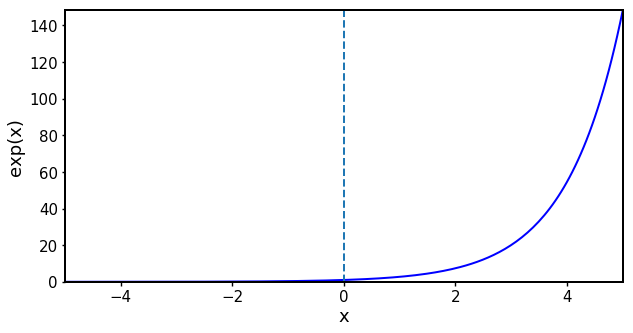

In [17]:
## Plot the exponential function over an adjustable x range.
%matplotlib inline
from numpy import linspace, exp
import matplotlib.pyplot as plt

xlim = 5.0                             # Range over which to plot exp(x)

x = linspace(-xlim, xlim, 200)
y = exp(x)

plt.figure(figsize=(10,5))
plt.plot(x, y, 'b')                    # Plot of exp(x)
plt.plot([0., 0.], [0., y[-1]], '--')  # Plot vertical dashes at x = 0, as a guide.
plt.xlabel('x');      plt.xlim(-xlim, xlim)
plt.ylabel('exp(x)'); plt.ylim(0., y[-1])
plt.show()

A noteworthy feature of $\exp(x)$ is that, for $x > 0$, it becomes large extremely quickly with increasing $x$; and for $x < 0$, it becomes small extremely quickly with decreasing $x$.

The exponential function has a number of other useful mathematical properties.  For instance, one can show that

$$\exp(x+y) = \exp(x)\,\exp(y) \quad \forall x, y \in \mathbb{R}.$$

[Try proving this as an exercise](#exercises).

As a corollary,

$$\exp(-x) = 1/\exp(x).$$

### The logarithm function

Because the exponential function is one-to-one, its inverse is also a well-defined function.  We call this the **natural logarithm**:

$$\ln(x) \equiv y \;\; \mathrm{such}\;\mathrm{that}\;\;\exp(y) = x.$$

Henceforth, unless otherwise noted, we will simply use the term "logarithm" to refer to the natural logarithm.  The domain of the logarithm is $y \in \mathbb{R}^+$, and its range is $\mathbb{R}$.

In Python, the logarithm is provided by the [`log`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) function in the Scipy module. The following code example plots its graph:

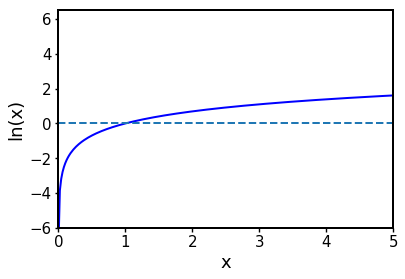

In [21]:
## Plot the natural logarithm function over an adjustable x range.
%matplotlib inline
from numpy import linspace, log
import matplotlib.pyplot as plt

xlim = 5.0                             # Range over which to plot ln(x)

x = linspace(1e-3, xlim, 250)
y = log(x)

plt.plot(x, y, 'b')                    # Plot graph of ln(x)
plt.plot([0., xlim], [0., 0.], '--')   # Plot horizontal dashes at x = 0
plt.xlabel('x');     plt.xlim(0., xlim)
plt.ylabel('ln(x)'); plt.ylim(-6, 6.5)
plt.show()

In the above graph, observe that for $x>0$, $\ln(x)$ increases very slowly with $x$. This is the opposite of the exponential function's behavior, where $\exp(x)$ increases very quickly with $x$.

One can prove that the logarithm satisfies the property

$$\ln(xy) = \ln(x) + \ln(y).$$

<a name="powers"></a>
### Non-natural powers

Having defined the exponential and logarithm functions, we have the tools needed to address the issue raised earlier, i.e. how to formulate the concept of a non-natural power.  First, observe that the natural power operation interacts with the exponential and logarithm functions in the following manner:

$$\begin{align} \ln(x^y) &= y \ln(x)\qquad\quad&\mathrm{for}&\;\;y \in \mathbb{N} \\ \Rightarrow\quad\quad x^y &= \exp[y \ln(x)] \quad &\mathrm{for}&\;\;y \in \mathbb{N}.\end{align}$$

Now, we generalize the above equation so that it holds for any positive $x$ and real $y$, not just $y \in \mathbb{N}$.  In other words, we treat this as our *definition* of the power operation for non-natural powers:

$$x^y \equiv \exp[y \ln(x)] \qquad\; \mathrm{for}\; x \in \mathbb{R}^+, \;y \notin \mathbb{N}.$$

By this definition, the power operation always gives a positive result.  You can also check for yourself that, for $y \in \mathbb{N}$, the formula is consistent with the results based on using the standard definition of "multiply $x$ by itself $y$ times".

This generalization of the power operation leads to several important consequences:
* Raising a positive number to the zeroth power gives unity: $\displaystyle x^0 = 1.$
* Negative powers are reciprocals: $\displaystyle x^{-y} = \exp[-y\ln(x)] = \exp[-\ln(x^y)] = \frac{1}{x^y}.$
* The exponential function can itself can be written as a power: $\displaystyle\exp(y) = e^y$, where $e \equiv \exp(1) = 2.718281828459\dots$
* Non-integer powers are only defined for non-negative $x$, since the logarithm does not accept negative inputs.

### Trigonometric functions<a name="trigonometric"></a>

The fundamental trignonometric functions $\sin(\theta)$, $\cos(\theta)$, and $\tan(\theta)$ can be defined in terms of the geometric ratios of the sides of right-angled triangles, as shown here:
<img src="img/trigonometry.png" alt="Basic definitions of trigonometric functions." width="300">

In this basic definition, the domain is $\theta \in [0, \,\pi/2)$, where the angle $\theta$ is given in radians.  We can generalize the definitions to allow for negative values of $a$ and/or $b$, using the following scheme:
<img src="img/trigonometry2.png" alt="Enhanced definitions of trigonometric functions." width="310">
With this, the angle $\theta$ lies within a larger domain: $\theta \in [0,\,2\pi)$. We can further generalize the trigonometric functions by extending the domain to all real numbers: $\theta \in \mathbb{R}$. This is done by treating all values of $\theta$ modulo $2\pi$ as equivalent, i.e. $f(\theta + 2\pi) = f(\theta)$.  With this generalization, the trigonometric functions become many-to-one functions.

From the [Pythagorean theorem](http://en.wikipedia.org/wiki/Pythagoras_theorem) (which can be proved in [many, many ways](http://www.faculty.umb.edu/gary_zabel/Courses/Phil%20281b/Philosophy%20of%20Magic/Arcana/Neoplatonism/Pythagoras/index.shtml.html)),

$$\big[\sin(\theta)\big]^2 + \big[\cos(\theta)\big]^2 = 1.$$

Armed with this result, we can go on to prove a variety of identities, like the addition identities

$$\begin{aligned}\sin(\theta_1 + \theta_2) &= \sin(\theta_1) \cos(\theta_2) + \cos(\theta_1)\sin(\theta_2) \\\cos(\theta_1 + \theta_2) &= \cos(\theta_1) \cos(\theta_2) - \sin(\theta_1)\sin(\theta_2)\end{aligned}$$

As you may recall, these identities can be proved by trigonometry; the proofs involve drawing the correct set of triangles, and choosing which sides of the triangles to put into the Pythagorean formula.  ([As an exercise](#exercises), try proving either of the above identities trigonometrically.)  There are two problems with such proofs: (i) they require a certain amount of ingenuity in choosing which triangle diagrams to draw, and (ii) it's not immediately obvious that the proofs work if the angles lie outside $[0,\pi/2]$.  Happily, there is a solution to both problems: as we'll soon see, trigonometric identities of this sort can be proven algebraically, with the aid of [complex numbers](03_complex_numbers.ipynb).

### Hyperbolic functions<a name="hyperbolic"></a>

The hyperbolic functions are important special functions which are defined in terms of exponentials:

$$\begin{aligned}\sinh(x) &= \frac{1}{2}\left(e^{x} - e^{-x}\right) \\ \cosh(x) &= \frac{1}{2}\left(e^{x} + e^{-x}\right) \\ \tanh(x) &= \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}\end{aligned}$$

These functions have properties intriguingly similar to the trignometric functions. For example, they have addition identities

$$\begin{aligned}\sinh(x+y) &= \sinh(x)\cosh(y) + \cosh(x)\sinh(y) \\
\cosh(x+y) &= \cosh(x)\cosh(y) + \sinh(x)\sinh(y)\end{aligned}$$

Because of these identities, it's sometimes more convenient to work with hyperbolic functions rather than exponentials. We'll see some examples later in the course.

<a name="continuity"></a>
## Continuity

**Continuity** is an important concept in the theory of real functions. A function is said to be continuous if its output $f(x)$ does not undergo any abrupt jumps when the input $x$ is varied by tiny amounts.  A function can be continuous over its entire domain, or only a subset of its domain. For example, $f(x) = 1/x$ is discontinuous at the origin $x = 0$.  So is the step function
$$\Theta(x) = \left\{\begin{array}{ll} 1, &\;\;\;\textrm{for} \; x \ge 0\\ 0,&\;\;\; \textrm{otherwise.}\end{array}\right.$$
Mathematicians have even come up with functions that are discontinuous everywhere in their domain, but such pathological cases are not commonly encountered, and we won't have to worry about them in this course.

The rigorous definition of continuity is as follows.  A function is continuous at a point $x_0$ if, for any $\epsilon > 0$, we can find a $\delta > 0$ such that setting $x$ closer to $x_0$ than a distance of $\delta$ brings $f(x)$ closer to $f(x_0)$ than the specified distance $\epsilon$.  This sounds like a very complicated sentence (and it is!), and it may be easier to understand it using the illustration below:

In [1]:
## Run this code to see an interactive graph illustrating the continuity concept 
%matplotlib inline
from ipywidgets import interact, FloatSlider
from scipy import linspace, tanh, arctanh
import matplotlib.pyplot as plt

def plot_continuity(epsilon):
    x, x0 = linspace(0.0, 3.0, 100), 1.0
    y, y0 = tanh(x-1), tanh(x0-1)
    y1 = y0 + epsilon;  x1 = 1 + arctanh(y1); delta = 0.5 * (x1 - x0)
    x2    = x0 + delta; y2 = tanh(x2-1)
    
    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,1,1)
    plt.plot(x, y, '#7812ff')
    plt.plot([x0,x0], [-1.,y0], 'grey', [0, x0], [y0, y0], 'grey')
    plt.plot([x1,x1], [-1.,y1], 'grey', [0, x1], [y1, y1], 'grey')
    plt.plot([x2,x2], [-1.,y2], 'grey', [0, x2], [y2, y2], 'grey')
    plt.plot(0, y0, 'o', color='black', markersize=10)
    plt.plot(0, y1, 'o', color='blue', markersize=10)
    plt.plot(0, y2, 'o', color='red', markersize=10)
    plt.title("For each epsilon, f(x0)+epsilon is denoted by a blue dot.\n\
I can choose delta so that for all x0 < x < x0 + delta,\n\
f(x) is closer to f(x0) than the blue dot.")
    plt.text(x0-0.03, -0.9, 'x0', fontsize=15, color='black')
    plt.text(-0.03, y0-0.15, 'f(x0)', fontsize=15, color='black')
    plt.annotate('', xy=(0.5, y0), xycoords='data', xytext=(0.5, y1), textcoords='data',
                 arrowprops={'color': 'blue', 'arrowstyle': '<->', 'linewidth':2})
    plt.text(0.55, 0.3*y0+0.7*y1, 'epsilon', fontsize=15, color='blue')
    plt.annotate('', xy=(x0, -0.6), xycoords='data', xytext=(x2, -0.6), textcoords='data',
                 arrowprops={'color': 'red', 'arrowstyle': '<->', 'linewidth':2})
    plt.text(0.02+x0, -0.5, 'delta', fontsize=15, color='red')
    plt.xlabel('x');    plt.xlim(-0.05, 2.4)
    plt.ylabel('f(x)'); plt.ylim(-0.8, 1.0)
    ax.get_xaxis().set_ticks([]); ax.get_yaxis().set_ticks([])

    plt.show()

interact(plot_continuity,
         epsilon=FloatSlider(min=0.2, max=0.8, step=0.05, value=0.5));

A counter-example, with a function that has a discontinuity at some $x_0$, is shown below.  If we choose $\epsilon$ smaller than the gap, then no matter what value of $\delta > 0$ we try, any choice of $0 < x < \delta$ will give a value of $f(x)$ that's further than $\epsilon$ from $f(x_0)$. Hence, the continuity condition is violated for sufficiently small choices of $\epsilon = 1/2$, and we say that $f(x)$ is **discontinuous** at $x_0$.

In [2]:
## Run this code cell to see an interactive graph demonstrating discontinuity
%matplotlib inline
from ipywidgets import interact, FloatSlider
from scipy import linspace, tanh, arctanh
import matplotlib.pyplot as plt

def plot_discontinuity(epsilon):
    dy = 0.25
    xa, xb, x0 = linspace(0., 1., 50), linspace(1.0, 3.0, 50), 1.0
    ya, yb, y0 = tanh(xa-1)- dy, tanh(xb-1)+dy, tanh(x0-1)-dy

    y1 = y0 + epsilon; x1 = max(x0, 1 + arctanh(y1-dy))
    
    plt.figure(figsize=(10,5))
    ax = plt.subplot(1,1,1)
    plt.plot(xa, ya, color='#7812ff')
    plt.plot(xb, yb, color='#7812ff')
    plt.plot([x0,x0], [-1.,y0], 'grey', [0, x0], [y0, y0], 'grey')
    plt.plot([x1,x1], [-1.,y1], 'grey', [0, x1], [y1, y1], 'grey')
    plt.plot(0, y0, 'o', color='black', markersize=10)
    plt.plot(0, y1, 'o', color='blue', markersize=10)
    plt.title("If epsilon is smaller than the gap,\n\
For any delta and x0 < x < x0 + delta,\n\
f(x) will be closer to f(x0) than the blue dot.")
    plt.text(x0+0.01, -0.75, 'x0', fontsize=15, color='black')
    plt.text(-0.03, y0-0.15, 'f(x0)', fontsize=15, color='black')
    plt.annotate('', xy=(0.5, y0), xycoords='data', xytext=(0.5, y1), textcoords='data',
                 arrowprops={'color': 'blue', 'arrowstyle': '<->', 'linewidth':2})
    plt.text(0.55, 0.3*y0+0.7*y1, 'epsilon', fontsize=15, color='blue')
    
    if epsilon > 2*dy:
        delta = 0.5 * (x1 - x0)
        x2    = x0 + delta
        y2    = tanh(x2-1) + dy
        plt.plot([x2,x2], [-1.,y2], 'grey', [0, x2], [y2, y2], 'grey')
        plt.plot(0, y2, 'o', color='red', markersize=10)
        plt.annotate('', xy=(x0, -0.6), xycoords='data', xytext=(x2, -0.6), textcoords='data',
                     arrowprops={'color': 'red', 'arrowstyle': '<->', 'linewidth':2})
        plt.text(0.02+x0, -0.5, 'delta', fontsize=15, color='red')
    else:
        plt.plot([x0,x0], [-1.,yb[0]], 'grey', [0, x0], [yb[0], yb[0]], 'grey')
        plt.plot(0, yb[0], 'o', color='red', markersize=10)

    plt.plot(xa[-1], ya[-1], 'o', color='#7812ff')
    plt.plot(xb[0], yb[0], 'o', markeredgecolor='#7812ff',
             markersize=7, markeredgewidth=2, markerfacecolor='#ffffff')
    
    plt.xlabel('x'); plt.xlim(-0.05, 2.0)
    plt.ylabel('f(x)'); plt.ylim(-0.8, 1.0)
    ax.get_xaxis().set_ticks([]); ax.get_yaxis().set_ticks([])
    plt.show()

interact(plot_discontinuity,
         epsilon=FloatSlider(min=0.2, max=1.0, step=0.05, value=0.8));

## Exercises
<a name="exercises"></a>

<ol>
<li>An alternative definition of the exponential function is the limiting expression<br/>
$$\exp(x) \equiv \lim_{n\rightarrow\infty} \left(1+\frac{x}{n}\right)^n.$$<br/>
Prove that this is equivalent to the definition in terms of an infinite series:<br/>$$\exp(x) \equiv 1 + \sum_{n=1}^\infty\frac{x^n}{n!}.$$</li>
<li>Prove that $\exp(x+y) = \exp(x)\,\exp(y)$, using the definition of the exponential as an infinite series.  Your proof must avoid using the concept of "raising to the power" of a non-natural number (this is to avoid circular logic, since this feature of the exponential function can be used in the [generalized definition of the power operation](#powers)).<br/>
<div style="text-align: right">[(Solution)](99_solutions.ipynb#00_02)</div><br/></li>
<li>One of the most important features of the exponential function $\exp(x)$ is that it becomes large *extremely* quickly with increasing $x$.  To illustrate this behavior, consider the [graph of the exponential function](#exponential function plot) above.  By default, the graph plots up to $x = 4$, and on your computer screen the height of the graph should be around 4cm.  Suppose we keep the same resolution, and plot up to $x = 10$; how high would the graph be?  What about if we plotted up to $x = 20$?</li>
<li>Prove that<br/>$$\exp(x) = e^x.$$<br/>
<div style="text-align: right">[(Solution)](99_solutions.ipynb#00_04)</div><br/></li>
<li>A "non-natural" logarithm of base $c$ is defined as<br/>
$$\log_c(x) = y \quad\mathrm{where}\;\; c^y = x.$$<br/>
Using the [generalized definition of the power operation](#exponential), derive an expression for the non-natural logarithm in terms of the natural logarithm.</li>
<li>Prove, using trigonometry, that<br/>$$\sin(\theta_1 + \theta_2) = \sin(\theta_1) \cos(\theta_2) + \cos(\theta_1)\sin(\theta_2).$$<br/>You may assume that $\theta_1, \theta_2 \in [0, \pi/2].$</li>
<li>Prove, using the [trigonometric addition formulas](#trigonometric), that<br/>$$\begin{align} \cos(3x) &= 4[\cos(x)]^3 -3\cos(x) \\ \sin(3x) &= 3\sin(x)-4[\sin(x)]^3\end{align}$$</li>
</ol>
